In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Car Dataset Practice

In [2]:
df = pd.read_csv('E:/Data Analyst Notes/DATASETS/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

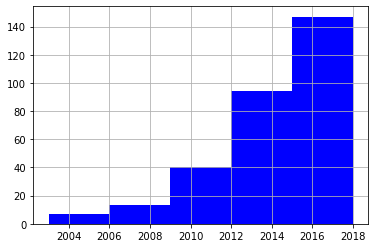

In [11]:
plt.hist(x = df['Year'],histtype='bar',bins=5,color='blue')
plt.grid()

In [13]:
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [14]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
print(df.Selling_type.value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [19]:
# Encoding the Categorical Data
df.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [21]:
#Splitting the dataset
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=2)

In [31]:
# Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [39]:
# Training Data Prediction
train_pred = lr.predict(xtrain)


In [ ]:
# Model Evaluation

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:
print('r2score is: ',r2_score(ytrain,train_pred))

r2score is:  0.8796483009370208


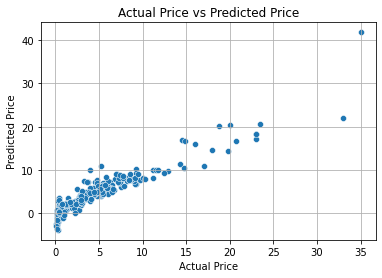

In [44]:
# Visualize the actual and predicted price
sns.scatterplot(ytrain,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.grid()
plt.show()


In [45]:
# Test Data Prediction
test_pred = lr.predict(xtest)
# Evaluation
print('r2score is: ',r2_score(ytest,test_pred))

r2score is:  0.8365861023212434


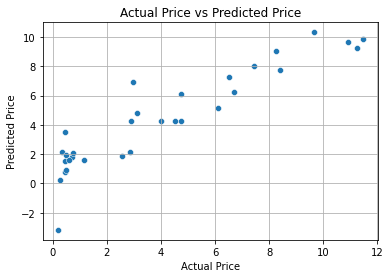

In [46]:
sns.scatterplot(ytest,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.grid()
plt.show()

In [47]:
# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

In [49]:
ls = Lasso()

In [50]:
ls = Lasso(alpha=10)

model = ls.fit(xtrain,ytrain)
lspred = model.predict(xtest)

train = model.score(xtrain,ytrain)
test = model.score(xtest,ytest)

print(f"Train accuracy {train}\nTest accuracy {test}")

Train accuracy 0.74346155976424
Test accuracy 0.751104215998877
